## Lib import

In [2]:
!pip install category_encoders

In [3]:
import pandas as pd
import numpy as np

from category_encoders.leave_one_out import LeaveOneOutEncoder
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.style.use('dark_background')

In [4]:
df = pd.read_csv("briliants_train.csv", index_col=0)
test = pd.read_csv("briliants_test.csv", index_col=0)

## EDA

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.25,Good,E,VVS2,64.9,58.0,3.95,3.97,2.57,476
1,0.84,Ideal,J,SI1,61.8,56.0,6.04,6.07,3.74,2493
2,1.05,Premium,J,VS2,61.1,58.0,6.56,6.51,3.99,4145
3,1.02,Ideal,F,SI2,60.7,56.0,6.53,6.50,3.95,4541
4,0.61,Ideal,F,VS1,61.8,57.0,5.43,5.47,3.37,2283


In [6]:
df.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798764,61.744959,57.459703,5.733197,5.736570,3.539683,3942.538302
std,0.474442,1.429037,2.228845,1.121532,1.143835,0.709975,3997.986695
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000,956.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2400.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5357.500000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18818.000000


In [7]:
#missing data
df.isnull().mean()

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
x          0.0
y          0.0
z          0.0
price      0.0
dtype: float64

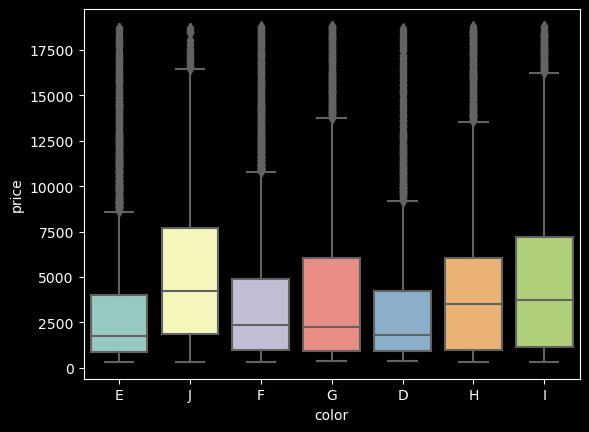

In [8]:
sns.boxplot(x='color',y='price',data=df)
plt.show()

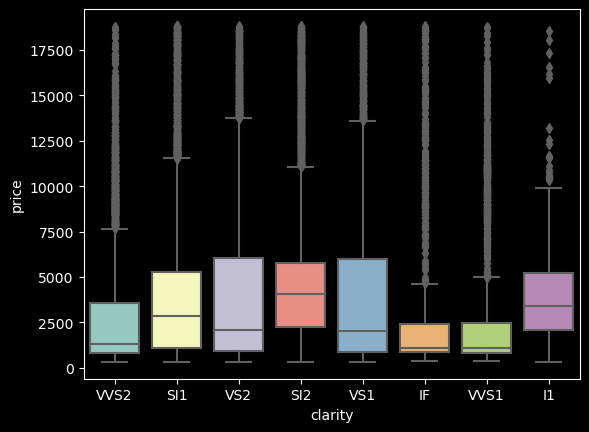

In [9]:
sns.boxplot(x='clarity',y='price',data=df)
plt.show()

<Axes: xlabel='cut', ylabel='price'>

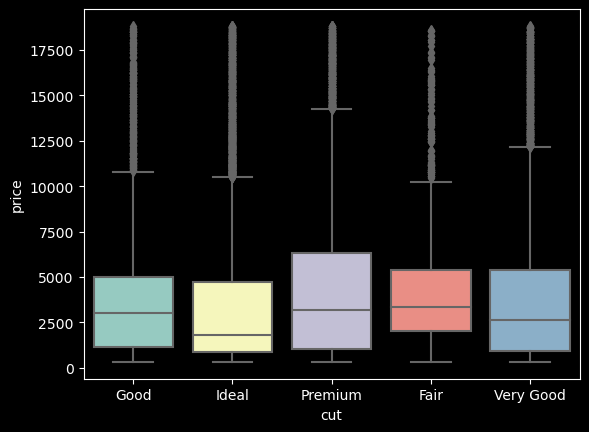

In [10]:
sns.boxplot(x='cut',y='price',data=df)

## Feature engineering

In [11]:
feature_list = df.columns[:-1]
target = df.columns[-1]

cat_feat_one = ['cut','color','clarity']

In [12]:
LOOE_encoder = LeaveOneOutEncoder()
train_looe = LOOE_encoder.fit_transform(df[feature_list], df[target])
test_looe = LOOE_encoder.transform(test[feature_list])

## Models

In [13]:
def report(model):
    preds = model.predict(X_val)
    MAE= mean_absolute_error(preds,y_val)
    MSE=mean_squared_error(preds,y_val)
    RMSE=np.sqrt(MSE)
    print('*'*50)
    print('Model: ',model)
    print('MAE:'+ str(MAE))
    print('RMSE:'+ str(RMSE))

In [14]:
X_train, X_val, y_train, y_val = train_test_split(train_looe, df[target], test_size=0.30, random_state=60)

In [15]:
rfr_model=RandomForestRegressor()
rfr_model.fit(X_train,y_train)

RandomForestRegressor()

In [16]:
gbr_model=GradientBoostingRegressor()
gbr_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [17]:
elastic_model=ElasticNetCV()
elastic_model.fit(X_train,y_train)

ElasticNetCV()

In [18]:
report(elastic_model)
report(gbr_model)
report(rfr_model)

**************************************************
Model:  ElasticNetCV()
MAE:2883.4927150629583
RMSE:3851.709593696475
**************************************************
Model:  GradientBoostingRegressor()
MAE:268.74838988088237
RMSE:475.8429275555266
**************************************************
Model:  RandomForestRegressor()
MAE:37.627502677762216
RMSE:175.2092394863943


## Predictions

# Валидация (Эрдэни)

In [20]:
y_pred2 = rfr_model.predict(test_looe)

In [21]:
len(y_pred2)

13485

In [24]:
df_true = pd.read_csv("briliants_y_true.csv")
y_true = df_true['price'].values
y_true

array([ 559, 2201, 1238, ..., 9215, 4416, 3564])

In [25]:
mean_squared_error(y_pred2,y_true, squared=False)

2030.2664846850548

In [26]:
mean_absolute_error(y_pred2,y_true)

1312.435155357805